In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/jyesh"

aisles.csv	   order_products__prior.csv  products.csv
departments.csv    order_products__train.csv  sample_submission.csv
FinalOutput.ipynb  orders.csv		      sub.csv


In [4]:
%cd "/content/drive/My Drive/jyesh"

/content/drive/My Drive/jyesh


In [5]:
!ls

aisles.csv	   order_products__prior.csv  products.csv
departments.csv    order_products__train.csv  sample_submission.csv
FinalOutput.ipynb  orders.csv		      sub.csv


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
import warnings

color = sns.color_palette()
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams.update({'font.size': 18})

In [7]:

all_depts = pd.read_csv('departments.csv') 
all_depts.head(5)
all_depts.describe(include = 'all')

,department_id,department
count,21.00,21
unique,nan,21
top,nan,deli
freq,nan,1
mean,11.00,NaN
std,6.20,NaN
min,1.00,NaN
25%,6.00,NaN
50%,11.00,NaN
75%,16.00,NaN


In [8]:
#### PRODUCTS
all_products = pd.read_csv('products.csv') #49688
all_products.head(5)
all_products.describe(include = 'all')


,product_id,product_name,aisle_id,department_id
count,"49,688.00",49688,"49,688.00","49,688.00"
unique,nan,49688,nan,nan
top,nan,Gluten Free Chicken Pot Pie,nan,nan
freq,nan,1,nan,nan
mean,"24,844.50",NaN,67.77,11.73
std,"14,343.83",NaN,38.32,5.85
min,1.00,NaN,1.00,1.00
25%,"12,422.75",NaN,35.00,7.00
50%,"24,844.50",NaN,69.00,13.00
75%,"37,266.25",NaN,100.00,17.00


In [9]:
###  ORDER TERMS
all_orders = pd.read_csv('orders.csv')
print(all_orders.shape) # (3421083, 7)
all_orders.head(5)

print("No. of first orders : ", all_orders.days_since_prior_order.isnull().sum())
print("No. of users : ",all_orders.user_id.nunique())


all_orders.describe()

(3421083, 7)
No. of first orders :  206209
No. of users :  206209


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,"3,421,083.00","3,421,083.00","3,421,083.00","3,421,083.00","3,421,083.00","3,214,874.00"
mean,"1,710,542.00","102,978.21",17.15,2.78,13.45,11.11
std,"987,581.74","59,533.72",17.73,2.05,4.23,9.21
min,1.00,1.00,1.00,0.00,0.00,0.00
25%,"855,271.50","51,394.00",5.00,1.00,10.00,4.00
50%,"1,710,542.00","102,689.00",11.00,3.00,13.00,7.00
75%,"2,565,812.50","154,385.00",23.00,5.00,16.00,15.00
max,"3,421,083.00","206,209.00",100.00,6.00,23.00,30.00


In [10]:
prior_orders = pd.read_csv('order_products__prior.csv')
print(prior_orders.shape)
prior_orders.head(5)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
train_set = pd.read_csv('order_products__train.csv')
print(train_set.shape)
train_set.head(5)

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [12]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


### ORDERS DATASET PARTITIONS



In [13]:
all_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.00
2,473747,1,prior,3,3,12,21.00
3,2254736,1,prior,4,4,7,29.00
4,431534,1,prior,5,4,15,28.00


In [14]:
all_orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [15]:
all_orders[['user_id','eval_set']].groupby('eval_set').nunique('user_id')['user_id']

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [16]:
set(all_orders.loc[all_orders['eval_set'] == 'train','user_id']) & set(all_orders.loc[all_orders['eval_set'] == 'test','user_id'])

set()

### ORDERS PER CUSTOMER


In [17]:
t = all_orders[['user_id','order_id']].groupby('user_id').nunique('order_id')['order_id']
print(t.max())
print(t.min())

100
4


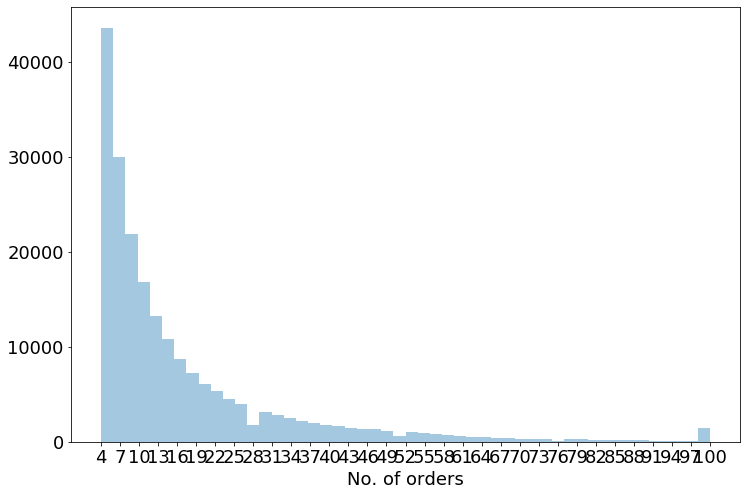

In [18]:
plt.figure(figsize=(12,8))
sns.distplot(t,norm_hist=False,kde=False,axlabel='No. of orders')
plt.xticks(range(min(t), max(t)+1, 3))
plt.show()

In [19]:
t1 = all_orders.loc[all_orders['eval_set']=='prior',['user_id','order_id']].groupby('user_id').nunique('order_id')['order_id']
print(t1.max())
print(t1.min())
print("No. of users in prior with maximum number of orders :" + str(sum(t1==t1.max())))
print("No. of users in prior with minimum number of orders :" + str(sum(t1==t1.min())))

99
3
No. of users in prior with maximum number of orders :1374
No. of users in prior with minimum number of orders :23986


### ORDERS BY TIME

In [20]:
all_orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
1,2398795,1,prior,2,3,7,15.00
2,473747,1,prior,3,3,12,21.00
3,2254736,1,prior,4,4,7,29.00
4,431534,1,prior,5,4,15,28.00


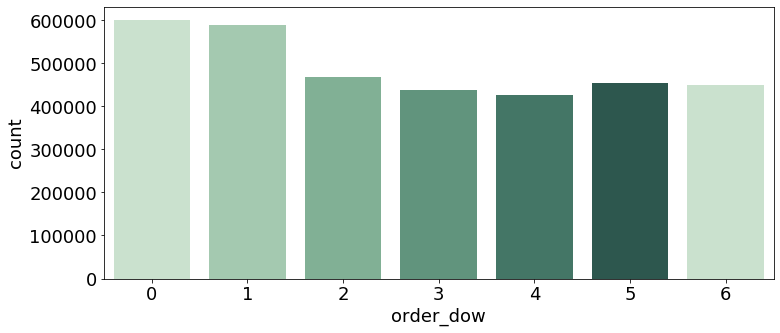

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(x="order_dow", data=all_orders,palette = sns.color_palette("ch:2.5,-.2,dark=.3"))

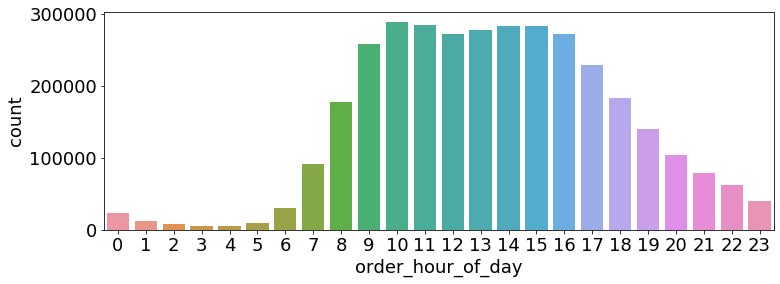

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(x="order_hour_of_day", data=all_orders)

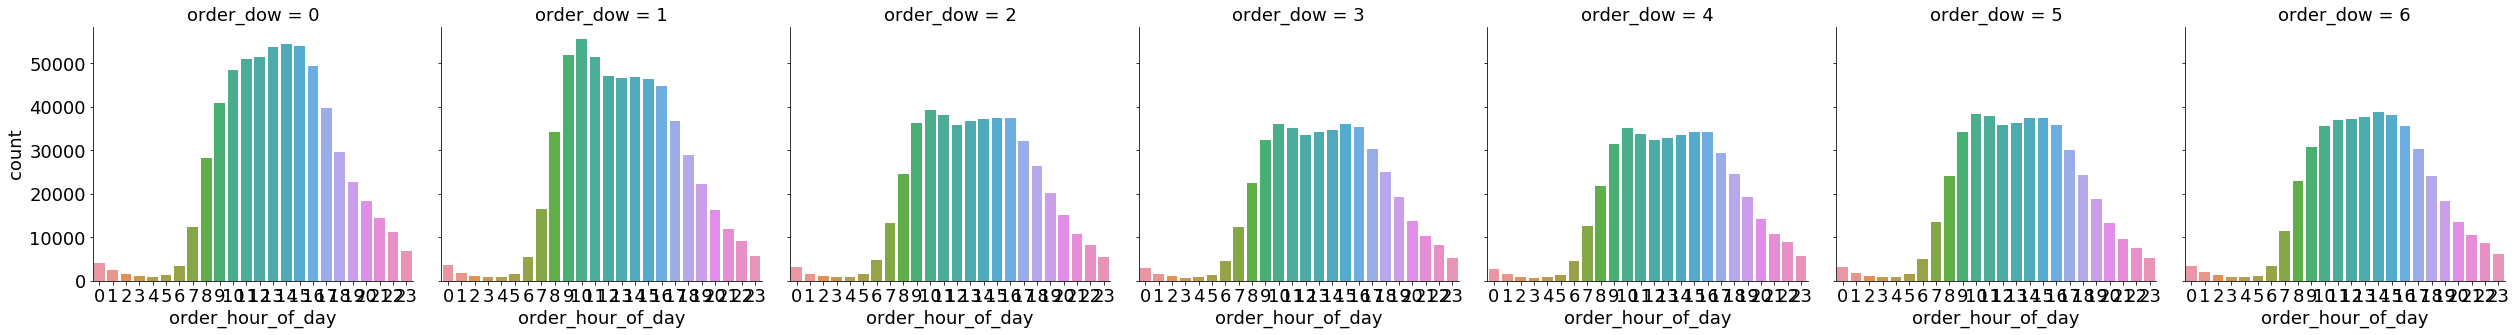

In [23]:
sns.catplot(x='order_hour_of_day',col="order_dow", data=all_orders,kind="count")

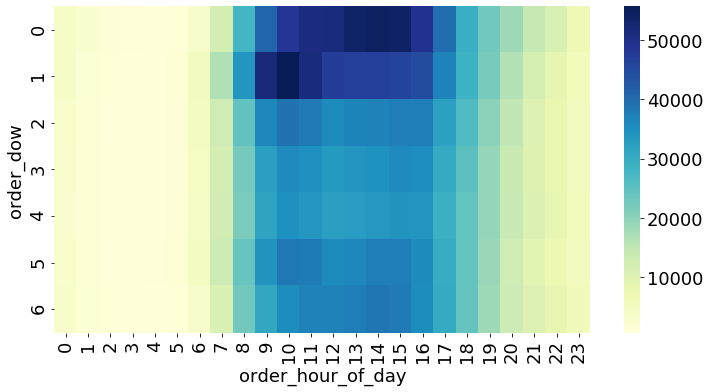

In [24]:
t = all_orders.groupby(['order_hour_of_day',"order_dow"])["order_id"].count().reset_index()
x = t.pivot("order_dow","order_hour_of_day","order_id")
plt.figure(figsize=(12,6))
sns.heatmap(x,cmap="YlGnBu")

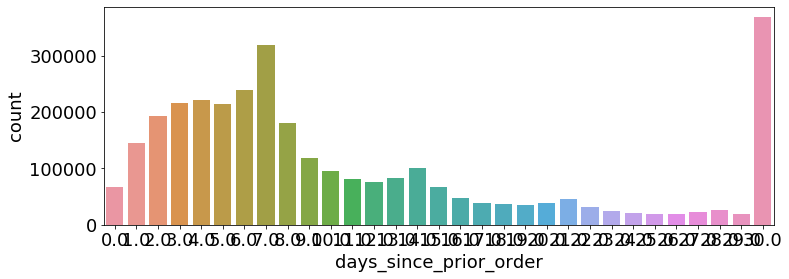

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(x="days_since_prior_order", data=all_orders)

### CUSTOMER BASKET STATS

In [26]:
first_orders = all_orders[all_orders.days_since_prior_order != all_orders.days_since_prior_order]
print(first_orders.shape)
print(first_orders.order_number.unique())
print(first_orders.eval_set.unique())
first_orders.head()

(206209, 7)
[1]
['prior']


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,nan
11,2168274,2,prior,1,2,11,nan
26,1374495,3,prior,1,1,14,nan
39,3343014,4,prior,1,6,11,nan
45,2717275,5,prior,1,3,12,nan


In [27]:
print(prior_orders.columns) # Just for reference

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


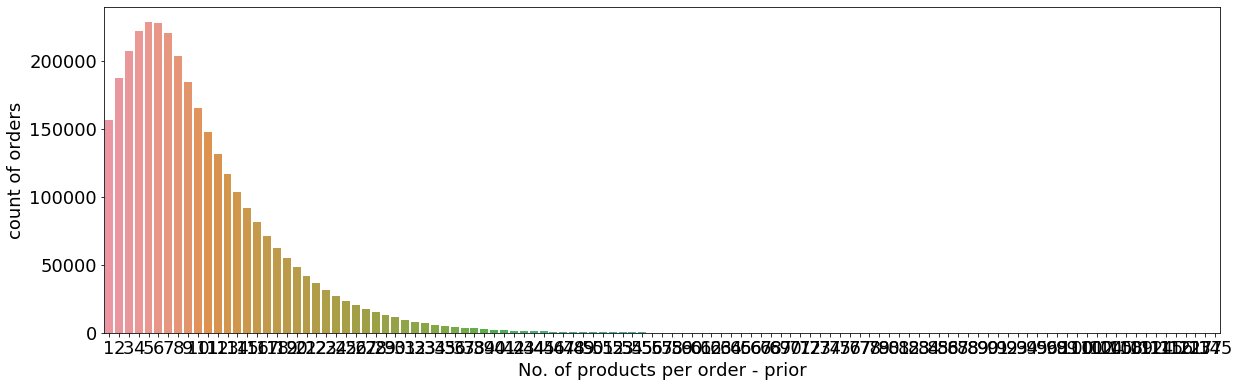

145


In [28]:
t = prior_orders.groupby('order_id')['product_id'].count().reset_index()
plt.figure(figsize=(20,6))
ax = sns.countplot(x='product_id',data=t)
ax.set(xlabel='No. of products per order - prior',ylabel='count of orders')
plt.show()
print(t['product_id'].max())

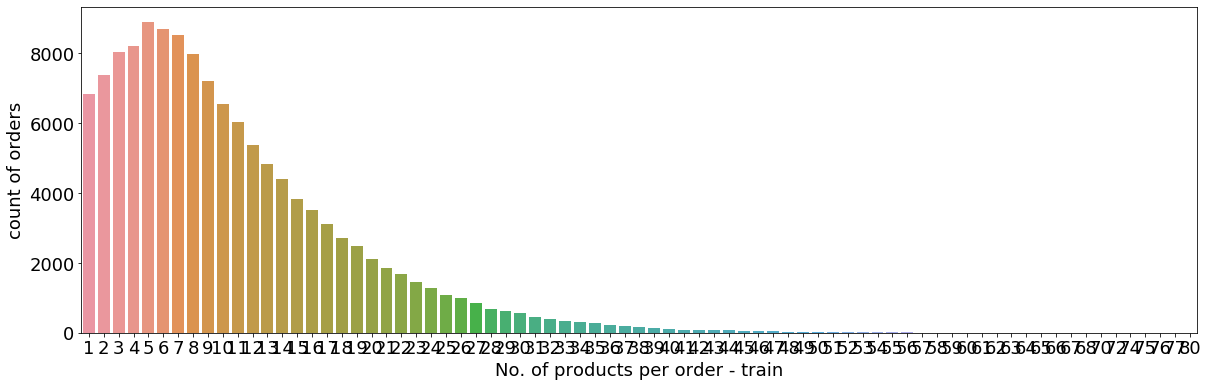

80


In [29]:
t = train_set.groupby('order_id')['product_id'].count().reset_index()
plt.figure(figsize=(20,6))
ax = sns.countplot(x='product_id',data=t)
ax.set(xlabel='No. of products per order - train',ylabel='count of orders')
plt.show()
print(t['product_id'].max())

Reordered distribution in prior orders : 
 1   0.59
0   0.41
Name: reordered, dtype: float64
Reordered distribution in train orders : 
 1   0.60
0   0.40
Name: reordered, dtype: float64


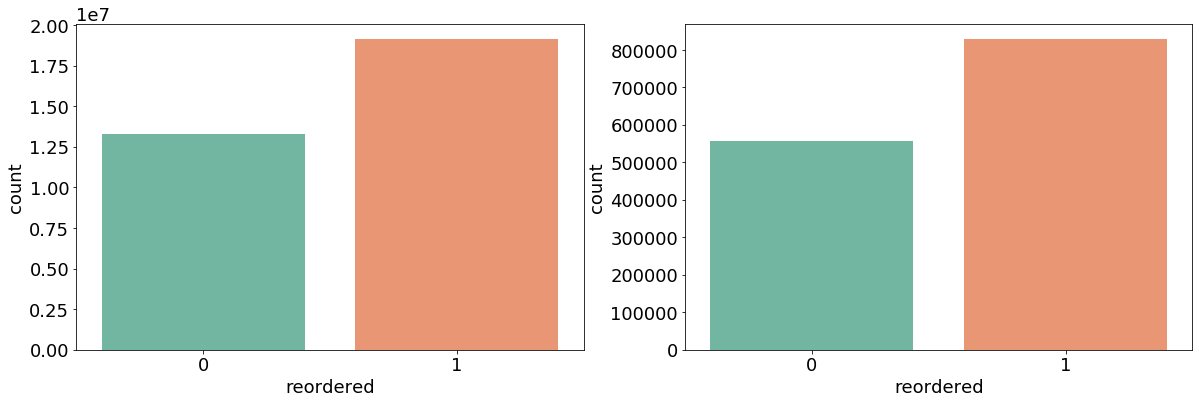

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize=(20,6))
sns.countplot(x= 'reordered',data = prior_orders, ax=ax[0],palette = sns.color_palette("Set2"))
sns.countplot(x= 'reordered',data = train_set, ax=ax[1],palette = sns.color_palette("Set2"))
print("Reordered distribution in prior orders : \n",prior_orders.reordered.value_counts(normalize=True))
print("Reordered distribution in train orders : \n",train_set.reordered.value_counts(normalize=True))

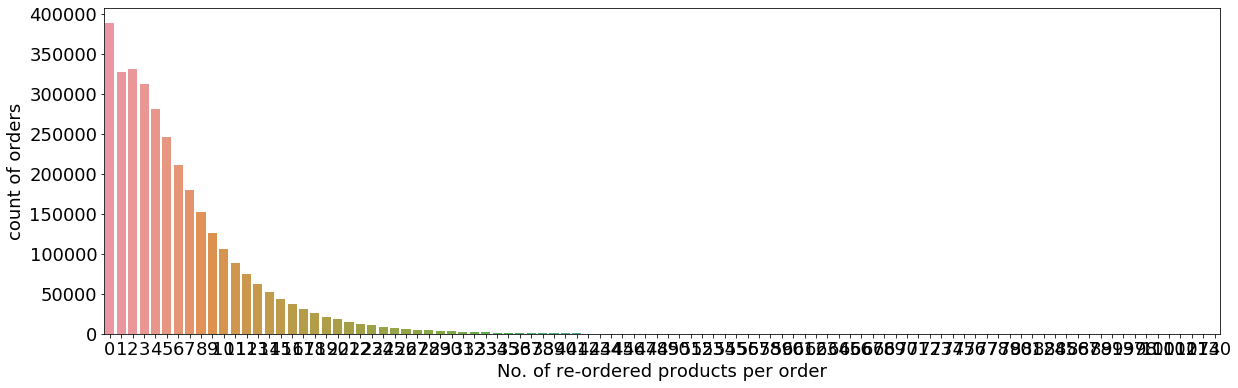

No. of orders with no reordered products in prior:  388513
% of orders with no reordered products in prior:  12.084859313304348


In [31]:
t = prior_orders.groupby('order_id')['reordered'].sum().reset_index()
plt.figure(figsize=(20,6))
#plt.xlabel('No. of re-ordered products per order')
#plt.ylabel('count of orders')
ax = sns.countplot(x='reordered',data=t)
ax.set(xlabel='No. of re-ordered products per order', ylabel='count of orders')
plt.show()
print("No. of orders with no reordered products in prior: ", t.loc[t['reordered'] == 0,'order_id'].size)
print("% of orders with no reordered products in prior: ",(t.loc[t['reordered'] == 0,'order_id'].size*100)/t['order_id'].size)

In [32]:
t = train_set.groupby('order_id')['reordered'].sum().reset_index()
print("No. of orders with no reordered products in train: ",t.loc[t['reordered'] == 0,'order_id'].size)
print("% of orders with no reordered products in train: ",(t.loc[t['reordered'] == 0,'order_id'].size*100)/t['order_id'].size)

No. of orders with no reordered products in train:  8602
% of orders with no reordered products in train:  6.555952716658156


### MAPPING THE RELATIONAL TABLES - OBSERVATIONS AGAINST TARGET VARIABLE

In [33]:
prior_orders_extended = prior_orders.merge(all_products[['product_id','aisle_id','department_id']], on='product_id', how='left').\
    merge(all_orders,on='order_id',how='left')
#    merge(all_aisles, on='aisle_id', how='left').\ # Removing as data too heavy \
#    merge(all_depts, on='department_id', how='left').\ # Removing as data too heavy \

prior_orders_extended.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,86,16,202279,prior,3,5,9,8.00
1,2,28985,2,1,83,4,202279,prior,3,5,9,8.00
2,2,9327,3,0,104,13,202279,prior,3,5,9,8.00
3,2,45918,4,1,19,13,202279,prior,3,5,9,8.00
4,2,30035,5,0,17,13,202279,prior,3,5,9,8.00


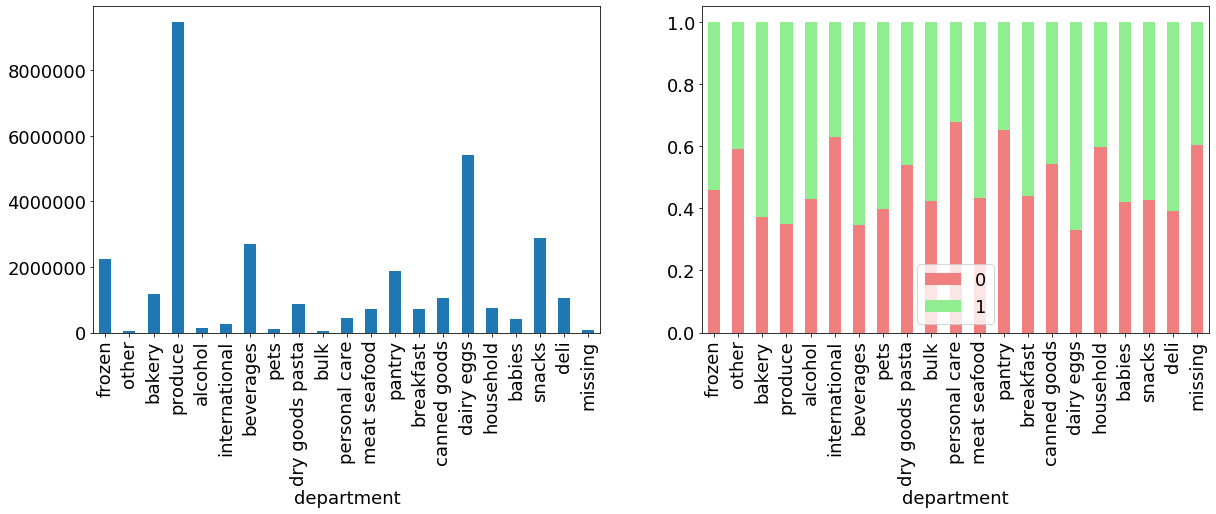

In [34]:
tab = pd.crosstab(prior_orders_extended['department_id'],prior_orders_extended['reordered'],values=prior_orders_extended['order_id'],aggfunc='count')
 # Mapping the names of dept here
tab = tab.merge(all_depts,how='left',left_index=True,right_on='department_id').drop('department_id',axis=1).set_index('department')
tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize=(20,6))
tab.sum(axis=1).plot(kind='bar',ax=ax[0])
tab_prop.plot(kind="bar", stacked=True, ax = ax[1],color = ['lightcoral','lightgreen'] )

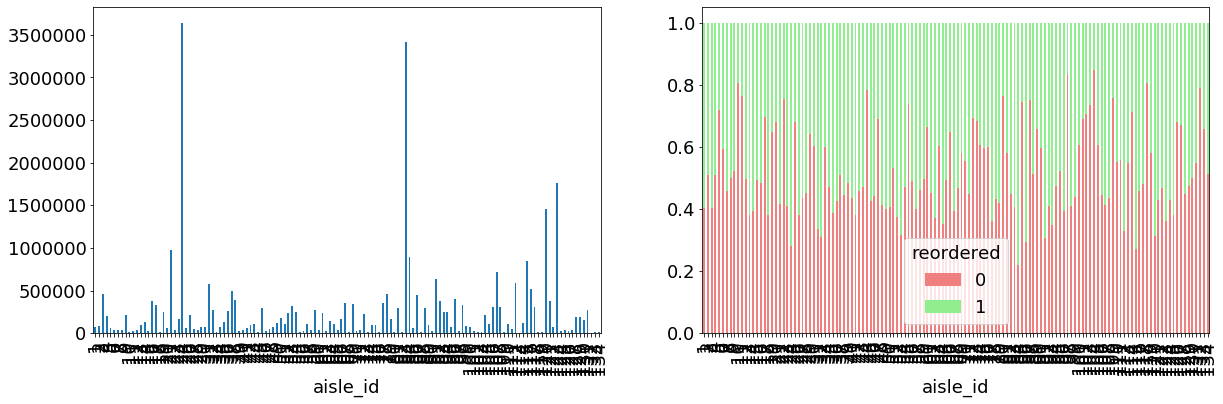

In [36]:
tab = pd.crosstab(prior_orders_extended['aisle_id'],prior_orders_extended['reordered'],values=prior_orders_extended['order_id'],aggfunc='count')
tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize=(20,6))
tab.sum(axis=1).plot(kind='bar',ax=ax[0])
tab_prop.plot(kind="bar", stacked=True, ax = ax[1],color = ['lightcoral','lightgreen'] )

In [0]:
prod_repeatability = prior_orders_extended.groupby('product_id').agg(\
    {'add_to_cart_order':'mean','reordered':['count','sum']})
prod_repeatability.columns = prod_repeatability.columns.map('_'.join)
prod_repeatability = prod_repeatability.reset_index().rename(columns=\
    {'add_to_cart_order_mean':'avg_cart_position','reordered_count':'Total_Purchases','reordered_sum':'Repeat_Purchases'})
prod_repeatability['%_repeated'] = prod_repeatability['Repeat_Purchases']/prod_repeatability['Total_Purchases']

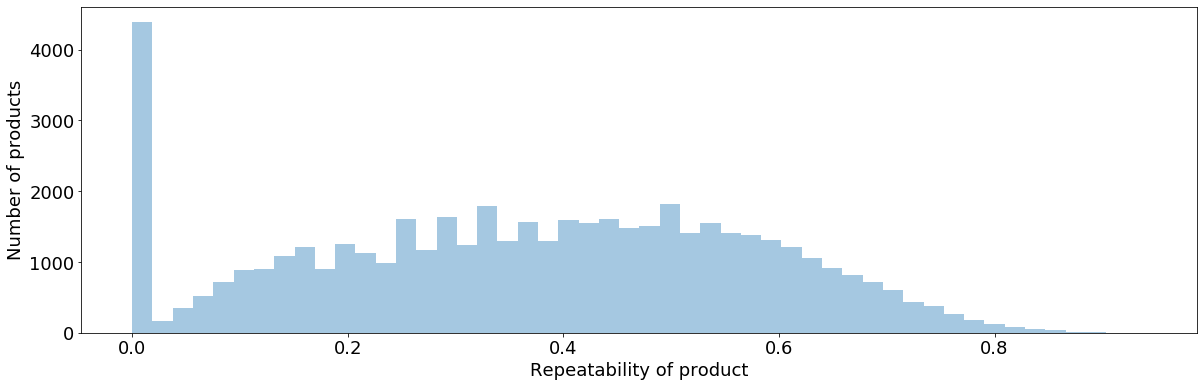

In [38]:
plt.figure(figsize=(20,6))
ax = sns.distplot(prod_repeatability['%_repeated'],kde=False)
ax.set(xlabel='Repeatability of product', ylabel='Number of products')
plt.show()


In [0]:
prod_cart_pos = prior_orders_extended.groupby('add_to_cart_order').agg({'reordered':['count','sum']}).reset_index()
prod_cart_pos.columns = prod_cart_pos.columns.map('_'.join)
prod_cart_pos = prod_cart_pos.reset_index().rename(columns=\
    {'reordered_count':'Total_Purchases','reordered_sum':'Repeat_Purchases'})
prod_cart_pos['%_repeated'] = prod_cart_pos['Repeat_Purchases']/prod_cart_pos['Total_Purchases']

In [46]:
prod_cart_pos.head()

,index,add_to_cart_order_,Total_Purchases,Repeat_Purchases,%_repeated
0,0,1,3214874,2178183,0.68
1,1,2,3058126,2068060,0.68
2,2,3,2871133,1889311,0.66
3,3,4,2664106,1696923,0.64
4,4,5,2442025,1507665,0.62


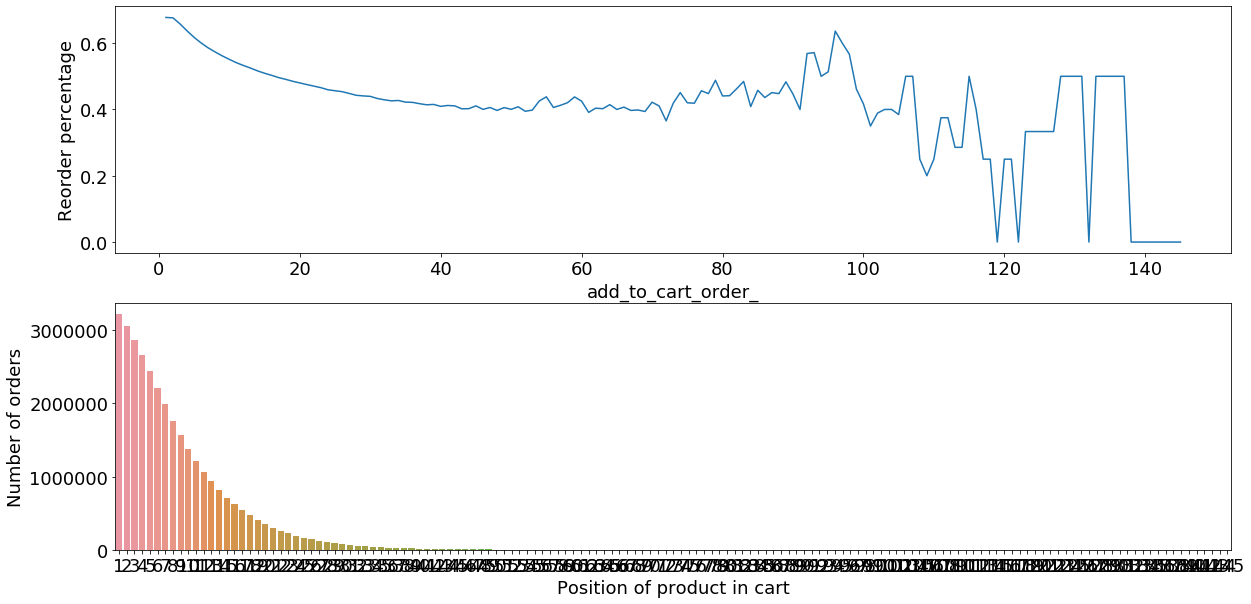

In [41]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(20,10))
sns.lineplot(data =prod_cart_pos,x='add_to_cart_order_' ,y='%_repeated',ax=ax[0] )
ax[0].set(ylabel='Reorder percentage')
sns.barplot(data =prod_cart_pos,x='add_to_cart_order_' ,y='Total_Purchases',ax=ax[1])
ax[1].set(xlabel='Position of product in cart', ylabel='Number of orders')
plt.show()